<a href="https://colab.research.google.com/github/marianaangeli/B2WReviews/blob/main/B2WReviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instala Bibliotecas

In [ ]:
!pip install -U datasets

# Importando Bibliotecas

In [ ]:
#Importa biblioteca para carregar datasets do Hugging face
from datasets import load_dataset
#Importa biblioteca para geração de gráficos
import matplotlib.pyplot as plt
import seaborn as sns
#Importa a biblioteca do pandas
import pandas as pd

# Visualização do dataset

In [ ]:
#Carrega dataset do Hugging face
ds = load_dataset("ruanchaves/b2w-reviews01")

In [4]:
# Converter para DataFrame
df = pd.DataFrame(ds['train'])

In [5]:
ds

DatasetDict({
    train: Dataset({
        features: ['submission_date', 'reviewer_id', 'product_id', 'product_name', 'product_brand', 'site_category_lv1', 'site_category_lv2', 'review_title', 'overall_rating', 'recommend_to_a_friend', 'review_text', 'reviewer_birth_year', 'reviewer_gender', 'reviewer_state'],
        num_rows: 132373
    })
})

# Preparação dos dados

In [6]:
df.shape

(132373, 14)

In [7]:
df.head()

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,None,Informática,Notebook,Bom,4,Yes,Estou contente com a compra entrega rápida o ú...,1958.0,F,RJ
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,None,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,"Por apenas R$1994.20,eu consegui comprar esse ...",1996.0,M,SC
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984.0,M,SP
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985.0,F,SP
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",lg,TV e Home Theater,TV,"Sem duvidas, excelente",5,Yes,"A entrega foi no prazo, as americanas estão de...",1994.0,M,MG


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132373 entries, 0 to 132372
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   submission_date        132373 non-null  object 
 1   reviewer_id            132373 non-null  object 
 2   product_id             132373 non-null  object 
 3   product_name           132289 non-null  object 
 4   product_brand          40982 non-null   object 
 5   site_category_lv1      132367 non-null  object 
 6   site_category_lv2      128360 non-null  object 
 7   review_title           132071 non-null  object 
 8   overall_rating         132373 non-null  int64  
 9   recommend_to_a_friend  132355 non-null  object 
 10  review_text            129098 non-null  object 
 11  reviewer_birth_year    126389 non-null  float64
 12  reviewer_gender        128237 non-null  object 
 13  reviewer_state         128382 non-null  object 
dtypes: float64(1), int64(1), object(12)


Verificando valores Nulos

In [9]:
df.isnull().sum()

,0
submission_date,0
reviewer_id,0
product_id,0
product_name,84
product_brand,91391
site_category_lv1,6
site_category_lv2,4013
review_title,302
overall_rating,0
recommend_to_a_friend,18


In [10]:
(df.isnull().sum() / len(df)) * 100

,0
submission_date,0.000000
reviewer_id,0.000000
product_id,0.000000
product_name,0.063457
product_brand,69.040514
site_category_lv1,0.004533
site_category_lv2,3.031585
review_title,0.228143
overall_rating,0.000000
recommend_to_a_friend,0.013598


In [11]:
# Preencher campos de categoria com 'desconhecido'
df['product_name'].fillna('desconhecido', inplace=True)
df['site_category_lv1'].fillna('desconhecido', inplace=True)
df['site_category_lv2'].fillna('desconhecido', inplace=True)

# Preencher texto vazio nos títulos
df['review_title'].fillna('', inplace=True)

# Preencher informações pessoais faltantes com "Não informado"
df['reviewer_gender'].fillna('Não informado', inplace=True)
df['reviewer_state'].fillna('Não informado', inplace=True)


<ipython-input-11-1506036335>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['product_name'].fillna('desconhecido', inplace=True)
<ipython-input-11-1506036335>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

Verificando duplicatas

In [12]:
df.duplicated().sum()

np.int64(955)

In [13]:
duplicatas = df[df.duplicated(keep=False)]
duplicatas

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state
12524,2018-01-10 07:05:00,b8d23d502c96dbdcc6e9bca62182ef54288f947a61daa0...,18913368,Chapinha Prancha Profissional Nano Titanium 1 ...,None,Beleza e Perfumaria,Cabelo,adorei o produto,5,Yes,"muito bom, recomendo. Atingiu minhas expectati...",1995.0,F,RJ
12525,2018-01-10 07:05:00,b8d23d502c96dbdcc6e9bca62182ef54288f947a61daa0...,18913368,Chapinha Prancha Profissional Nano Titanium 1 ...,None,Beleza e Perfumaria,Cabelo,adorei o produto,5,Yes,"muito bom, recomendo. Atingiu minhas expectati...",1995.0,F,RJ
13564,2018-01-10 21:32:28,af2bab007eef5b69fd7af3c7f4609df9ccfda552432fed...,125994248,Moedor de Carne Premium Lenoxx Preto,lenoxx,Eletroportáteis,Moedor de Carne,defeito ocukt,1,No,Sou usei duas vezes esta na autorizada para c...,1938.0,M,RJ
13565,2018-01-10 21:32:28,af2bab007eef5b69fd7af3c7f4609df9ccfda552432fed...,125994248,Moedor de Carne Premium Lenoxx Preto,lenoxx,Eletroportáteis,Moedor de Carne,defeito ocukt,1,No,Sou usei duas vezes esta na autorizada para c...,1938.0,M,RJ
22819,2018-01-18 06:37:39,de54ed17436113a487da4077ec64edbae83903421b03f0...,113173979,Escova Rotativa Tourmaline Infinity Ion ER-03 ...,mondial,Beleza e Perfumaria,Aparelhos elétricos para cabelo,GOSTO DO PRODUTO. MAS FUI LIGAR ELA RPIMEIRA V...,5,Yes,"EU AMO ESSA ESCOVA, MAS INFELIZMENTE FUI LIGAR...",1984.0,M,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132212,2018-05-31 17:06:41,2393577f0cbe1d1abc2d0c2be82cf50e145272ddcb8a8b...,20775635,Conjunto De Mesa Para Sala De Jantar Genebra C...,None,Móveis,Sala de Jantar,Produto veio com pé trocado - sem retorno amer...,1,No,"O produto foi entregue, porém a base do tampo ...",1982.0,M,RS
132320,2018-05-31 20:14:40,7b695aaf41b90abca0a33c38fedf72aca0f9905b979faf...,128313170,Box DVD - Verdades Secretas,None,Filmes e Séries,Nacional,enganoso,1,No,"diz ser sem cortes,todo editado varias cenas d...",1990.0,M,CE
132321,2018-05-31 20:14:40,7b695aaf41b90abca0a33c38fedf72aca0f9905b979faf...,128313170,Box DVD - Verdades Secretas,None,Filmes e Séries,Nacional,enganoso,1,No,"diz ser sem cortes,todo editado varias cenas d...",1990.0,M,CE
132354,2018-05-31 22:06:59,07a0e80b0d3c862a124b0df01ee12cd3c57048f292d3a3...,32909352,Kit Manopla Bola De Cambio Tipo B Parafusada 5...,None,Automotivo,Autopeças,Produto avariado,1,No,"Recebi o produto faltando duas peças, entrei e...",1986.0,F,PB


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

np.int64(0)

# Distribuição das avaliações

In [16]:
tab_aval = df['overall_rating'].value_counts().sort_index()
tab_aval

,count
overall_rating,
1,26752
2,8306
3,16226
4,32279
5,47855


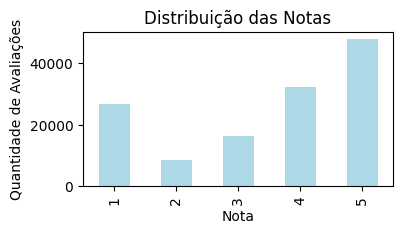

In [17]:
fig, ax = plt.subplots(figsize=(4,2))
df['overall_rating'].value_counts().sort_index().plot(kind='bar', ax=ax, color='lightblue')
ax.set_title('Distribuição das Notas')
ax.set_xlabel('Nota')
ax.set_ylabel('Quantidade de Avaliações')
ax.tick_params(axis='x', rotation=90)
plt.show()

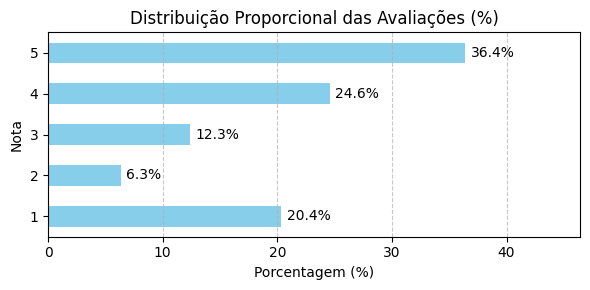

In [18]:
# Conta quantidade por nota
contagem = df['overall_rating'].value_counts().sort_index()

# Calcula proporção percentual
percentual = contagem / contagem.sum() * 100

# Plotando o gráfico
plt.figure(figsize=(6,3))
ax = percentual.plot(kind='barh', color='skyblue')

plt.title('Distribuição Proporcional das Avaliações (%)')
plt.xlabel('Porcentagem (%)')
plt.ylabel('Nota')

# Adicionar os valores percentuais na barra
for i, v in enumerate(percentual):
    ax.text(v + 0.5, i, f'{v:.1f}%', va='center')

plt.xlim(0, percentual.max() + 10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Proporção de Recomendação

In [19]:
# Contar recomendações para amigo
recommend_counts = df['recommend_to_a_friend'].value_counts()
recommend_counts

,count
recommend_to_a_friend,
Yes,96099
No,35301


Text(0.5, 1.0, 'Recomendaria a um Amigo?')

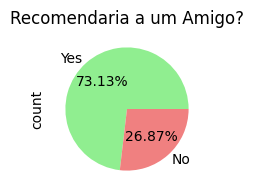

In [20]:
plt.figure(figsize=(4, 2))
recommend_counts.plot(kind='pie', autopct='%1.2f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Recomendaria a um Amigo?')

# Distribuição por estado

<Axes: xlabel='reviewer_state'>

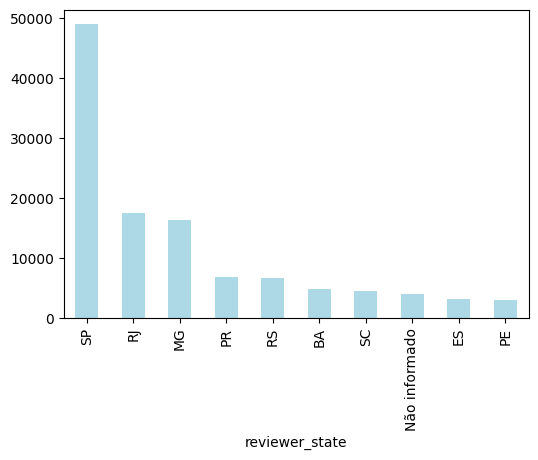

In [21]:
plt.figure(figsize=(6, 4))
df['reviewer_state'].value_counts().head(10).plot(kind='bar', color='lightblue')

# Avaliações por gênero

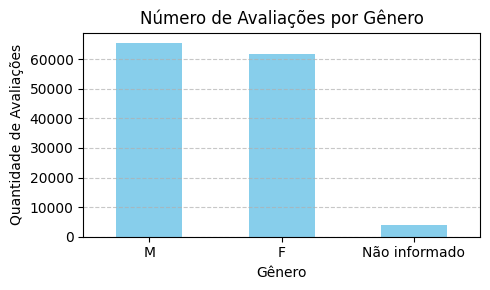

In [22]:
# Contar o número de avaliações por gênero
avaliacoes_por_genero = df['reviewer_gender'].dropna().value_counts()

# Criar gráfico de barras
plt.figure(figsize=(5,3))
avaliacoes_por_genero.plot(kind='bar', color='skyblue')

plt.title('Número de Avaliações por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Avaliações')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

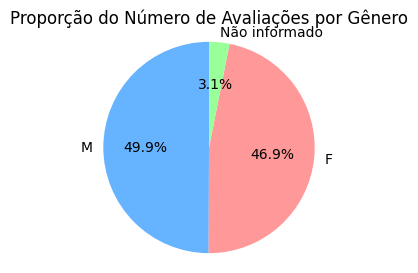

In [23]:
plt.figure(figsize=(3,3))
avaliacoes_por_genero.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999','#99ff99'])
plt.title('Proporção do Número de Avaliações por Gênero')
plt.ylabel('')  # Remove o label do eixo y para limpar o gráfico
plt.axis('equal')  # Garante que o gráfico fique redondo
plt.show()

# 10 categorias de produtos mais avaliadas

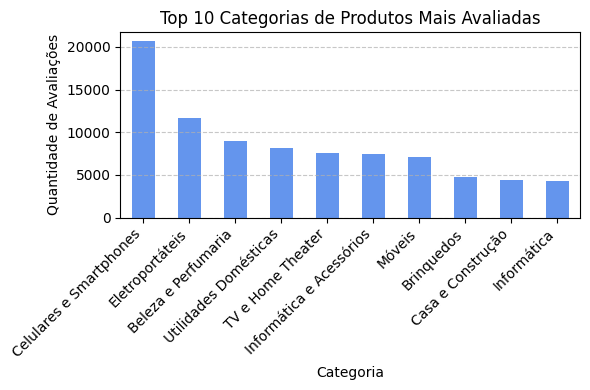

In [24]:
# Contar avaliações por categoria
categoria_counts = df['site_category_lv1'].dropna().value_counts().head(10)

plt.figure(figsize=(6,4))
categoria_counts.plot(kind='bar', color='cornflowerblue')
plt.title('Top 10 Categorias de Produtos Mais Avaliadas')
plt.xlabel('Categoria')
plt.ylabel('Quantidade de Avaliações')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Produtos mais e menos avaliados

In [25]:
# Contar avaliações por produto
prod_counts = df['product_name'].dropna().value_counts()

# 5 produtos mais avaliados
top_5_produtos = prod_counts.head(5)

# 5 produtos menos avaliados
bottom_5_produtos = prod_counts.tail(5)

print("5 Produtos Mais Avaliados:")
print(top_5_produtos)

print("\n5 Produtos Menos Avaliados:")
print(bottom_5_produtos)


5 Produtos Mais Avaliados:
product_name
Smartphone Motorola Moto G 5S Dual Chip Android 7.1.1 Nougat Tela 5.2" Snapdragon 430 32GB 4G Câmera 16MP - Platinum    790
Aspirador de Pó Philco Rapid 1000N Vermelho/Preto - 1000W                                                               755
Smartphone Samsung Galaxy J7 Metal Dual Chip Android 6.0 Tela 5.5" 16GB 4G Câmera 13MP - Dourado                        671
Smartphone Motorola Moto G 5S Dual Chip Android 7.1.1 Nougat Tela 5.2" Snapdragon 430 32GB 4G Câmera 16MP - Dourado     556
Smartphone Samsung Galaxy J7 Prime Dual Chip Android Tela 5.5" 32GB 4G Câmera 13MP - Dourado                            517
Name: count, dtype: int64

5 Produtos Menos Avaliados:
product_name
Tênis Casual Conforto Beira Rio                              1
Toldo Versátil Artplas 120x60cm Branco E Cristal             1
Barra De Cereal Nestlé Banana, Aveia E Mel 60g 3 Unidades    1
Capa Protetora Toyota Corola Com Cadeado                     1
Tempo de Amar - CD  

# Proporção de avaliação (1-5) das top 10 categorias de produtos mais vendidas

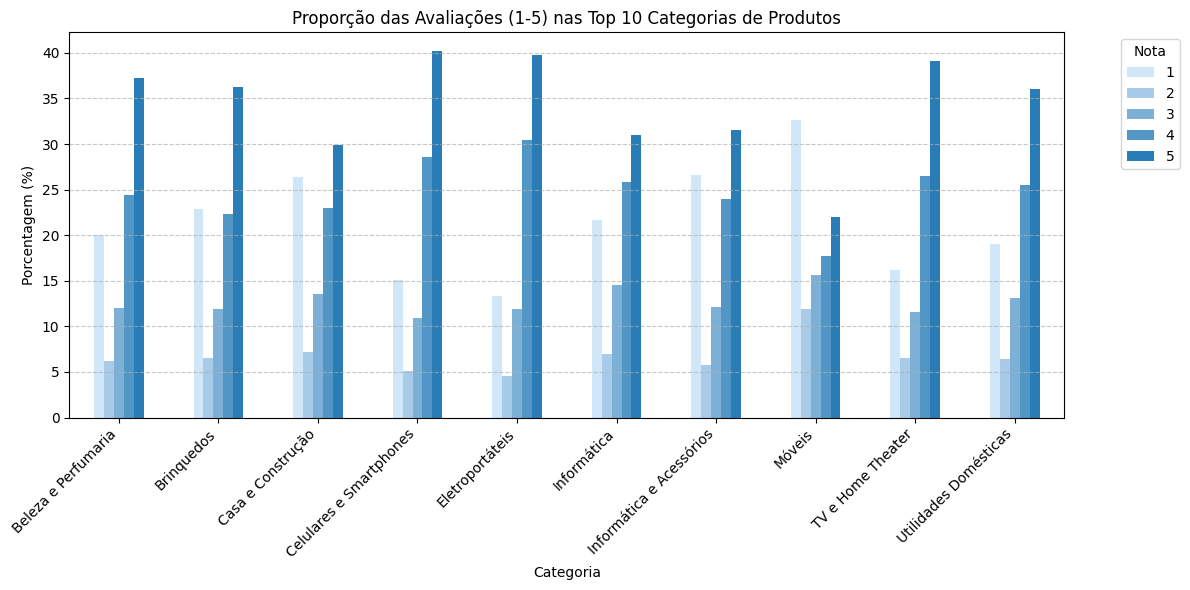

In [26]:
# 1. Top 10 categorias mais avaliadas
top10_categorias = df['site_category_lv1'].dropna().value_counts().head(10).index

# 2. Filtrar DataFrame para essas categorias
df_top10 = df[df['site_category_lv1'].isin(top10_categorias)]

# 3. Criar tabela cruzada: categorias x notas (1-5)
contagem = pd.crosstab(df_top10['site_category_lv1'], df_top10['overall_rating'])

# 4. Converter para proporção (%)
proporcao = contagem.div(contagem.sum(axis=1), axis=0) * 100

# 5. Definir tons de azul do claro ao escuro (notas 1 a 5)
cores_azul = ['#d0e6f9', '#a7cbe8', '#7db0d7', '#5296c6', '#297cb5']

# 6. Criar gráfico
ax = proporcao.plot(kind='bar', figsize=(12,6), color=cores_azul)

# 7. Ajustes estéticos
ax.set_title('Proporção das Avaliações (1-5) nas Top 10 Categorias de Produtos')
ax.set_xlabel('Categoria')
ax.set_ylabel('Porcentagem (%)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(title='Nota', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


# Nuvem das palavras mais frequentes encontradas nos textos das avaliações positivas

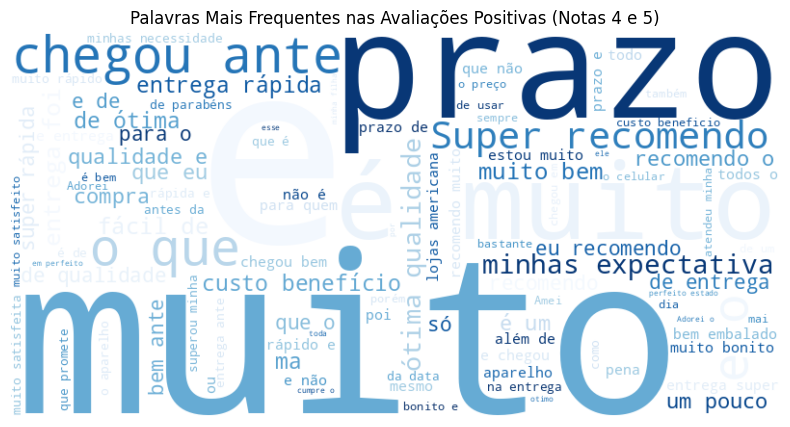

In [27]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Filtrar avaliações positivas (notas 4 e 5) e remover valores nulos
avaliacoes_positivas = df[df['overall_rating'].isin([4, 5])]
avaliacoes_positivas = avaliacoes_positivas['review_text'].dropna()

# Juntar todos os textos em um único string
texto = ' '.join(avaliacoes_positivas)

# Adicionar stopwords (palavras irrelevantes)
stopwords = set(STOPWORDS)
stopwords.update(['produto', 'ótimo', 'boa', 'bom', 'excelente', 'gostei'])  # você pode ajustar isso

# Gerar a WordCloud
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=stopwords,
                      colormap='Blues',
                      max_words=100).generate(texto)

# Mostrar a WordCloud
plt.figure(figsize=(14, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palavras Mais Frequentes nas Avaliações Positivas (Notas 4 e 5)')
plt.show()

# Distribuição de avaliações por faixa etária

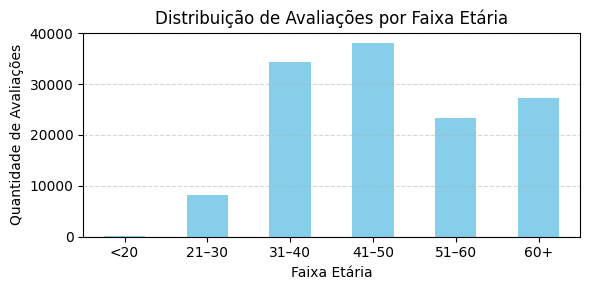

In [28]:
# Calcular idade
df['idade'] = 2025 - df['reviewer_birth_year']

# Criar coluna de faixa etária
def faixa_etaria(idade):
    if idade < 20:
        return '<20'
    elif idade <= 30:
        return '21–30'
    elif idade <= 40:
        return '31–40'
    elif idade <= 50:
        return '41–50'
    elif idade <= 60:
        return '51–60'
    else:
        return '60+'

df['faixa_etaria'] = df['idade'].apply(faixa_etaria)

# Criar df_idade
df_idade = df.copy()

# Contar quantidade de avaliações por faixa etária
contagem = df_idade['faixa_etaria'].value_counts().reindex(['<20', '21–30', '31–40', '41–50', '51–60', '60+'])

# Plotar gráfico de barras
plt.figure(figsize=(6, 3))
contagem.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Avaliações por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de Avaliações')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Correlação entre Avaliações e Recomendação ('overall_rating') para uma amigo

recommend_to_a_friend     No    Yes
overall_rating                     
1                      25976    776
2                       6260   2046
3                       1860  14364
4                        505  31774
5                        700  47139


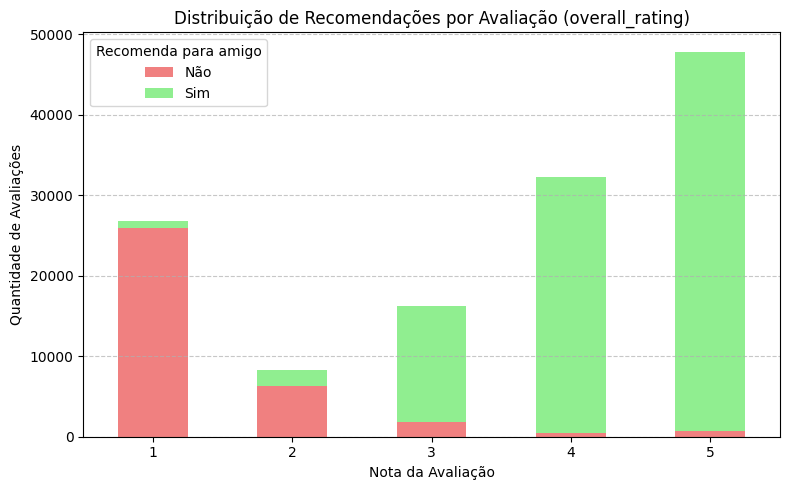

In [29]:
# Gerar tabela cruzada
tabela_cruzada = pd.crosstab(df['overall_rating'], df['recommend_to_a_friend'])
print(tabela_cruzada)

# Plotar gráfico de barras empilhadas
tabela_cruzada.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'], figsize=(8,5))

plt.title('Distribuição de Recomendações por Avaliação (overall_rating)')
plt.xlabel('Nota da Avaliação')
plt.ylabel('Quantidade de Avaliações')
plt.legend(title='Recomenda para amigo', labels=['Não', 'Sim'])
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Produtos com maior índice de avaliações negativas

In [30]:
# Definir avaliações negativas (notas 1 e 2)
negativas = df[df['overall_rating'].isin([1, 2])]

# Total de avaliações por produto
total_avaliacoes = df.groupby('product_id').size()

# Avaliações negativas por produto
negativas_por_produto = negativas.groupby('product_id').size()

# Criar DataFrame resumo
resumo = pd.DataFrame({
    'total_avaliacoes': total_avaliacoes,
    'avaliacoes_negativas': negativas_por_produto
}).fillna(0)

# Calcular proporção bayesiana para suavizar (prior beta)
alpha_prior = 1
beta_prior = 1
resumo['proporcao_negativa_bayes'] = (resumo['avaliacoes_negativas'] + alpha_prior) / (resumo['total_avaliacoes'] + alpha_prior + beta_prior)

# Filtrar produtos com pelo menos 30 avaliações para evitar viés
resumo_filtrado = resumo[resumo['total_avaliacoes'] >= 30]

# Ordenar decrescente para ver os piores índices
produtos_mais_negativos = resumo_filtrado.sort_values(by='proporcao_negativa_bayes', ascending=False)

# Mostrar top 10 produtos
top10_negativos = produtos_mais_negativos.head(10)

# Pegar nomes dos produtos para facilitar leitura
produtos_nome = df.drop_duplicates(subset='product_id')[['product_id', 'product_name']].set_index('product_id')
top10_negativos = top10_negativos.join(produtos_nome)

print(top10_negativos[['total_avaliacoes', 'avaliacoes_negativas', 'proporcao_negativa_bayes', 'product_name']])

            total_avaliacoes  avaliacoes_negativas  proporcao_negativa_bayes  \
product_id                                                                     
27417642                  40                  38.0                  0.928571   
28347922                  35                  28.0                  0.783784   
23428092                  39                  30.0                  0.756098   
7344163                   48                  32.0                  0.660000   
16201930                  32                  21.0                  0.647059   
132990587                266                 170.0                  0.638060   
27525626                  45                  28.0                  0.617021   
127115067                 37                  23.0                  0.615385   
130006339                 39                  24.0                  0.609756   
122694792                 43                  26.0                  0.600000   

                                       

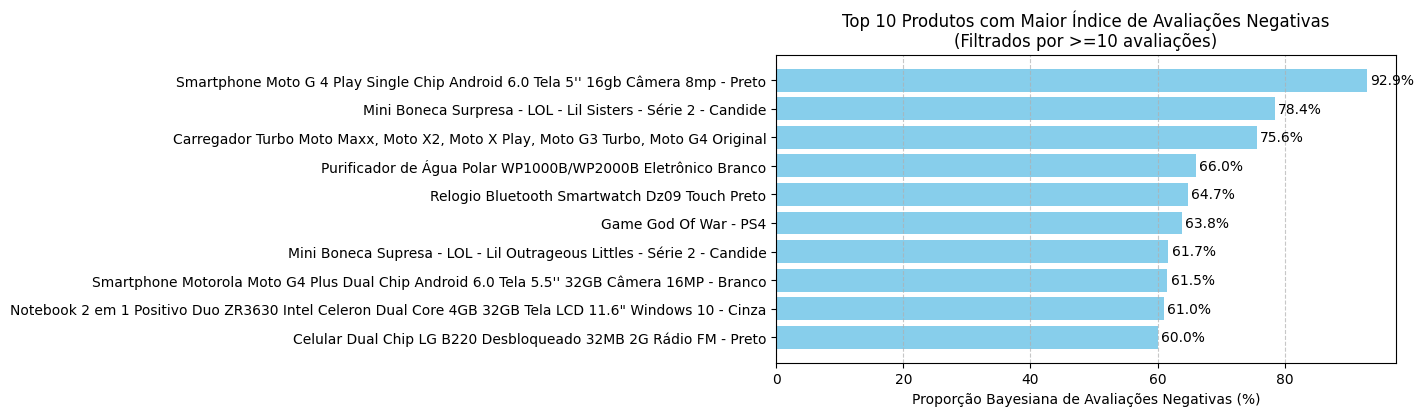

In [31]:
# Plotar gráfico
plt.figure(figsize=(8,4))
bars = plt.barh(top10_negativos['product_name'], top10_negativos['proporcao_negativa_bayes']*100, color='skyblue')
plt.xlabel('Proporção Bayesiana de Avaliações Negativas (%)')
plt.title('Top 10 Produtos com Maior Índice de Avaliações Negativas\n(Filtrados por >=10 avaliações)')
plt.gca().invert_yaxis()  # Inverter eixo Y para o maior ficar em cima
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adicionar os valores percentuais no final de cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', va='center')



# Satisfação por categoria de produto

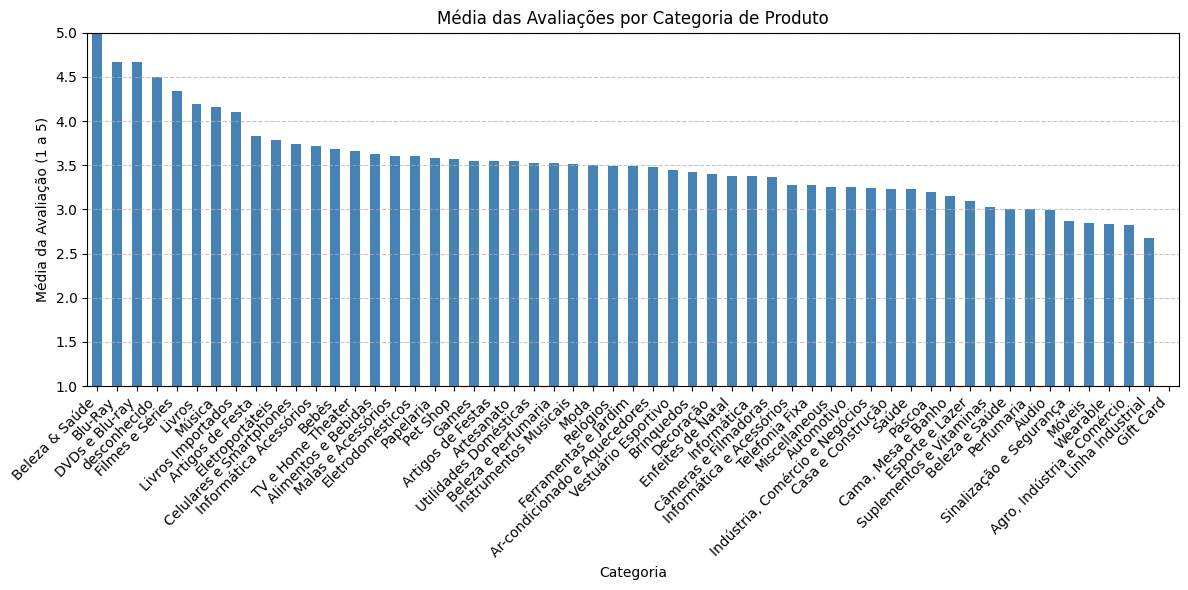

In [32]:
# Calcular a média das avaliações por categoria
media_por_categoria = df.groupby('site_category_lv1')['overall_rating'].mean().sort_values(ascending=False)

# Plotar gráfico de barras
plt.figure(figsize=(12,6))
media_por_categoria.plot(kind='bar', color='steelblue')
plt.title('Média das Avaliações por Categoria de Produto')
plt.xlabel('Categoria')
plt.ylabel('Média da Avaliação (1 a 5)')
plt.ylim(1,5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Evolução da média das avaliações ao longo do tempo

In [33]:
df['submission_date'] = pd.to_datetime(df['submission_date'], errors='coerce')
df['ano_mes'] = df['submission_date'].dt.to_period('M').astype(str)
avaliacao_mensal = df.groupby('ano_mes')['overall_rating'].mean()

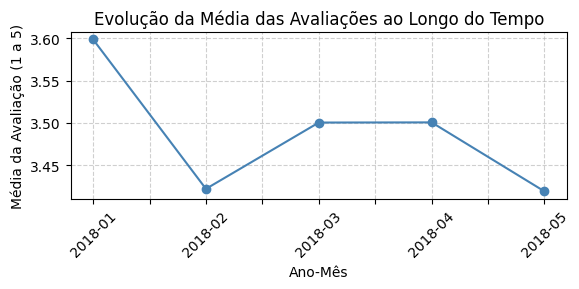

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
avaliacao_mensal.plot(marker='o', color='steelblue')
plt.title('Evolução da Média das Avaliações ao Longo do Tempo')
plt.xlabel('Ano-Mês')
plt.ylabel('Média da Avaliação (1 a 5)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Carregando o modelo para gerar textos

In [35]:
from transformers import pipeline
pipe = pipeline("text-generation", model="unsloth/Llama-3.2-1B-Instruct")

config.json:   0%|          | 0.00/894 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.47G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/54.7k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/454 [00:00<?, ?B/s]

chat_template.jinja:   0%|          | 0.00/3.83k [00:00<?, ?B/s]

Device set to use cuda:0


# Mensagem em forma de chat

In [36]:
messages = [
    {"role": "user", "content": "Olá, tudo bem?"},
]

pipe(messages)

[{'generated_text': [{'role': 'user', 'content': 'Olá, tudo bem?'},
   {'role': 'assistant',
    'content': 'Olá! Estou tudo bem, obrigado por perguntar. Como posso ajudá-lo hoje?'}]}]

#Indicando produtos a um amigo

Dado o título do produto e a review, devemos verificar se o modelo consegue prever corretamente se o autor do comentário indicaria ou não o produto

In [37]:
df[['review_title', 'review_text']].head()

,review_title,review_text
0,Bom,Estou contente com a compra entrega rápida o ú...
1,"Preço imbatível, ótima qualidade","Por apenas R$1994.20,eu consegui comprar esse ..."
2,ATENDE TODAS AS EXPECTATIVA.,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...
3,presente mais que desejado,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...
4,"Sem duvidas, excelente","A entrega foi no prazo, as americanas estão de..."


In [38]:
example = df.sample(n=1, random_state=21)
print('Titulo: ', example['review_title'].to_list()[0])
print()
print('Review: ', example['review_text'].to_list()[0])

Titulo:  Reclamação

Review:  Ainda não recebi o produto, produto passou do prazo de entrega.


In [39]:
messages = [
      {"role": "user", "content": """
        Você é uma assistente que vai receber uma revisão de um produto e deve dizer se o autor da review recomenda ou não o produto para um amigo.
        Gere uma explicação passo a passo de uma forma resumida do porquê o produto seria ou não recomendado.
        Titulo: Reclamação
        Review: Ainda não recebi o produto, produto passou do prazo de entrega..
        """},
]
output = pipe(messages,temperature=0.01)[0]["generated_text"][1]['content']
print('Saida do modelo: ', output)

Saida do modelo:  **Reclamação**

**Review:** Ainda não recebi o produto, produto passou do prazo de entrega..

**Explicação Passo a Passo:**

1.  **Revisão do produto**: O produto foi recebido e não apresenta nenhum problema mecânico ou de qualidade.
2.  **Entrega do produto**: O produto foi entregue no prazo de entrega estabelecido, o que é um fator importante para a confiança do cliente.
3.  **Prazo de entrega**: O prazo de entrega foi cumprido, o que é um fator importante para a confiança do cliente.
4.  **Problemas**: Não há nenhum problema mecânico ou de qualidade no produto.
5.  **Recomendação**: Devido à entrega do produto no prazo e à ausência de problemas, não há razão para que o produto seja recomendado a um amigo.

**Conclusão:**

O produto foi entregue no prazo e não apresentou nenhum problema mecânico ou de qualidade. Portanto, não há razão para que o produto seja recomendado a um amigo.


# Gerando descrição automática do produto

Dado o nome do produto e sua categoria, devemos instruir o modelo a gerar uma descrição automática do produto.

In [40]:
messages = [
    {"role": "user", "content": """Dado o nome do produto abaixo, gere uma descrição sucinta para atrair a venda desse produto.
                                  Titulo: Fone De Ouvido Eb-201bk Preto Lite; Categoria: Áudio"""},
]
output = pipe(messages,temperature=0.01)[0]["generated_text"][1]['content']
output

'**Fone De Ouvido Eb-201bk Preto Lite: O Poder do Sonho de Ouvido Claro**\n\nVocê está procurando por um fone de ouvido que combine beleza estética com funcionalidade de alta qualidade? Então, você encontrou exatamente o que está procurando! O Fone De Ouvido Eb-201bk Preto Lite é uma opção incrível para quem busca uma experiência de ouvido de alta qualidade, sem comprometer a beleza estética.\n\nCom um design elegante e minimalista, este fone de ouvido é perfeito para quem deseja um produto que não se destaque, mas que ainda seja muito atraente. Além disso, o fone é projetado para oferecer uma experiência de ouvido de alta qualidade, com tecnologia de alta fidelidade e uma resposta sonora clara e precisa.\n\nCom uma bateria de longa duração e um design compacto, o Fone De Ouvido Eb-201bk Preto Lite é perfeito para uso diário. Além disso, o fone é fácil de instalar e usar, o que o torna uma opção ideal para quem está procurando por um produto fácil de usar.\n\nNão perca a oportunidade d

In [41]:
messages = [
    {"role": "user", "content": """Dado o nome do produto abaixo, gere uma descrição sucinta para atrair a venda desse produto para o seguinte perfil de compradores:
                                  Jovens de 15 a 20 anos que gostam de jogar video-game;
                                  Titulo: Fone De Ouvido Eb-201bk Preto Lite; Categoria: Áudio"""},
]
output = pipe(messages,temperature=0.01)[0]["generated_text"][1]['content']
output

'**Descubra o Fone De Ouvido Eb-201bk Preto Lite: O Perfeito Complemento para Jogos de Video!**\n\nVocê está procurando por um fone de ouvido que combine beleza e funcionalidade? Então, você veio ao lugar certo! O Fone De Ouvido Eb-201bk Preto Lite é o produto perfeito para você.\n\nCom um design elegante e minimalista, este fone de ouvido é perfeito para jogos de vídeo, música e até mesmo para assistir filmes em alta definição. Com uma boa qualidade de som e uma resposta sonora clara, você pode desfrutar de uma experiência de ouvido inesquecível.\n\nAlém disso, o Fone De Ouvido Eb-201bk Preto Lite é leve e fácil de carregar, o que o torna perfeito para uso diário. Com uma bateria de até 12 horas de uso, você pode jogar por horas sem precisar recarregar.\n\nSe você está procurando por um fone de ouvido que combine beleza e funcionalidade, o Fone De Ouvido Eb-201bk Preto Lite é o produto perfeito para você. Não perca mais tempo, compre agora e descubra o que você pode esperar de um fone

In [42]:
messages = [
    {"role": "user", "content": """Dado o nome do produto abaixo, gere uma descrição sucinta para atrair a venda desse produto para o seguinte perfil de compradores:
                                  Adultos de mais de 40 anos a 60 anos;
                                  Titulo: Fone De Ouvido Eb-201bk Preto Lite; Categoria: Áudio"""},
]
output = pipe(messages,temperature=0.01)[0]["generated_text"][1]['content']
output

'**Descubra o Sonho de Ouvir de Novas Frequências com o Fone De Ouvido Eb-201bk Preto Lite!**\n\nVocê está procurando por um fone de ouvido que combine beleza estética com funcionalidade excepcional? O Fone De Ouvido Eb-201bk Preto Lite é o produto perfeito para você! Com sua design elegante e suave, este fone de ouvido se destaca em qualquer ambiente, tornando-o perfeito para uso diário.\n\n**Funcionalidades de Destaque:**\n\n- **Frequência de Ouvido Alta:** O Fone De Ouvido Eb-201bk Preto Lite oferece uma frequência de ouvido de até 20 kHz, permitindo que você ouça sons de forma mais clara e detalhada.\n- **Conectividade Wi-Fi:** Conecte-se rapidamente a seus dispositivos móveis e de computador com a tecnologia Wi-Fi, garantindo uma conexão estável e rápida.\n- **Bateria de Longa Duração:** Com uma bateria de longa duração, você pode ouvir sem interrupções por horas sem precisar recarregar.\n- **Design Estético:** O Fone De Ouvido Eb-201bk Preto Lite é projetado para ser um acessório

#Gerando o resumo de revisões de um produto

Dado as top-3 avaliações aleátorias de um determinado produto, devemos instruir ao modelo a gerar um resumo das avaliações.

Essa prática é semelhante ao empregado em RAG (Retrieval-Augmented Generation), isto é, o modelo utiliza de fontes externas (infos de um DB, busca da internet, documentos internos) para compor a saída final.

In [43]:
from collections import Counter
Counter(df['product_name'].to_list()).most_common(3)

[('Smartphone Motorola Moto G 5S Dual Chip Android 7.1.1 Nougat Tela 5.2" Snapdragon 430 32GB 4G Câmera 16MP - Platinum',
  790),
 ('Aspirador de Pó Philco Rapid 1000N Vermelho/Preto - 1000W', 755),
 ('Smartphone Samsung Galaxy J7 Metal Dual Chip Android 6.0 Tela 5.5" 16GB 4G Câmera 13MP - Dourado',
  671)]

In [44]:
prod_name = 'Smartphone Motorola Moto G 5S Dual Chip Android 7.1.1 Nougat Tela 5.2" Snapdragon 430 32GB 4G Câmera 16MP - Platinum'
filter_prod = df[df['product_name']==prod_name].sample(3 , random_state=15)
filter_prod

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state,idade,faixa_etaria,ano_mes
58148,2018-03-13 13:45:14,e042d6e0efb51d97ba7926dcd39123595c075814bec9b0...,132444092,Smartphone Motorola Moto G 5S Dual Chip Androi...,None,Celulares e Smartphones,Smartphone,Produto muito bom,4,Yes,"Tem um ótimo custo beneficio, bastante recurso...",2000.0,M,TO,25.0,21–30,2018-03
41149,2018-02-22 06:02:23,e6bb069acfdfe373c5c89d9403dc3efd520b16e9c8327e...,132444092,Smartphone Motorola Moto G 5S Dual Chip Androi...,None,Celulares e Smartphones,Smartphone,entrega pessima,1,No,None,1996.0,M,DF,29.0,21–30,2018-02
96886,2018-04-21 16:36:51,e6db27c66d0d97679301fbab171d070e0d5557b0d096ec...,132444092,Smartphone Motorola Moto G 5S Dual Chip Androi...,None,Celulares e Smartphones,Smartphone,Excelente produto!!,5,Yes,Produto muito bom... O atendimento Americanas....,1963.0,M,PR,62.0,60+,2018-04


In [45]:
messages = [
      {"role": "user", "content": """
        Dada as reviews de um produto abaixo, gere um único resumo geral.
        Review 1:
        Adorei o produto
        Como faço para fazer seguro do celular ? quero fazer e como proceder

        Review 2:
        Excelente custo e benefício
        Ótimo aparelho. Surpreende na qualidade da mantagem, acabamento e material aplicado na carcaça. Mas dá umas travada de vez em quando. Não é o aparelho mais rápido do mundo mas tem excelente desempenho. Até o momento não tivemos nem um problema

        Review 3:
        Moto g5S
        Compra e entrega ocorreram conforme esperado. Estou plenamente satisfeito com a compra."""},
]
output = pipe(messages,temperature=0.01)[0]["generated_text"][1]['content']
print('Saida do modelo: ', output)

Saida do modelo:  **Resumo Geral do Produto: Moto G5S**

O Moto G5S é um smartphone de alta qualidade que oferece uma excelente experiência de usuário. Aqui estão alguns pontos positivos e negativos do produto:

**Pontos Positivos:**

- Excelente desempenho e velocidade
- Mantimento e acabamento de alta qualidade
- Custo acessível
- Compatibilidade com operadoras de todo o mundo

**Pontos Negativos:**

- Pode ter um pouco de "travada" de vez em quando
- Não é o aparelho mais rápido do mundo

**Conclusão:**

O Moto G5S é um smartphone de alta qualidade que oferece uma excelente experiência de usuário. Com sua excelente desempenho, mantimento e acabamento, é um investimento valioso para quem busca um aparelho de alta qualidade.


# Insights e Recomendações

Principais Descobertas

Padrão de Avaliações

O dataset demonstra uma polarização nas avaliações, com predominância de notas 1 e 4/5, seguindo o padrão U típico de plataformas de e-commerce. Isso pode sugerir que clientes neutros avaliem menos. Observa-se uma tendência geral positiva, com maior concentração de avaliações favoráveis (4-5 estrelas) em relação às negativas.

Correlação Satisfação-Recomendação

Identificou-se uma forte correlação entre a nota da avaliação e a propensão do cliente a recomendar o produto, indicando que a satisfação é um preditor confiável da lealdade do cliente e do potencial de marketing boca-a-boca.

Distribuição Demográfica e Geográfica

A análise revelou participação equilibrada entre gêneros no engajamento com reviews. Geograficamente, observa-se concentração regional significativa, sugerindo oportunidades de expansão em mercados menos explorados.

Performance por Categoria

Eletrônicos e smartphones dominam o volume de avaliações, refletindo o alto envolvimento do consumidor com produtos de maior valor. A análise identificou variações significativas na satisfação entre categorias, com algumas apresentando oportunidades claras de melhoria.

Produtos Críticos

O estudo identificou produtos com índices alarmantes de avaliações negativas, sinalizando necessidade de ação imediata para gestão de crise e revisão de qualidade.

Oportunidades de Melhoria

Curto Prazo

Intervenção imediata nos produtos com alta negatividade

Implementação de monitoramento em tempo real da satisfação

Criação de programas de incentivo para aumentar o engajamento com reviews

Médio e Longo Prazo

Desenvolvimento de estratégias segmentadas por demografia e categoria

Implementação de análise de sentimento automatizada usando IA

Criação de sistema preditivo para antecipar problemas de satisfação


Conclusão Estratégica

Os dados revelam uma base sólida de satisfação do cliente, mas com oportunidades claras de otimização. A implementação das recomendações propostas, especialmente o foco em produtos problemáticos e a personalização da experiência por segmento, pode resultar em melhorias significativas no NPS, retenção de clientes e performance de vendas.